In [2]:
import sys
sys.path.append("../src")

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from validation import hold_out
from preprocess import min_max_scaler
from perceptron import Perceptron

# Paso 1: Cargar el dataset Iris y convertirlo a un DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Paso 2: Filtrar solo las clases Setosa (0) y Virginica (2)
iris_filtered = iris_df[iris_df['target'].isin([0, 2])]

# Seleccionar todas las características (sépalos y pétalos) y etiquetas
X_filtered = iris_filtered[['sepal length (cm)', 'sepal width (cm)', 
                            'petal length (cm)', 'petal width (cm)']].values.tolist()
y_filtered = iris_filtered['target'].apply(lambda x: 0 if x == 0 else 1).tolist()  # Setosa -> 0, Virginica -> 1

# Paso 3: Normalizar todas las características
X_scaled = min_max_scaler(X_filtered)

# Paso 4: Dividir los datos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = hold_out(X_scaled, y_filtered, test_size=0.3)

# Paso 5: Entrenar el perceptrón con las características extendidas
perceptron = Perceptron(n_features=4, learning_rate=0.1, max_epochs=100)
perceptron.fit(X_train, y_train)

# Paso 6: Evaluar el modelo
accuracy = perceptron.evaluate(X_test, y_test)
print(f"Precisión del perceptrón en el conjunto de prueba: {accuracy:.2f}")

# Probar con algunos datos del conjunto de prueba
for x, y_true in zip(X_test[:5], y_test[:5]):  # Mostrar predicciones para los primeros 5 datos
    y_pred = perceptron.predict(x)
    print(f"Entrada: {x}, Etiqueta Real: {y_true}, Predicción: {y_pred}")

Epoch 1: Errores: 0
Precisión del perceptrón en el conjunto de prueba: 30.00
Entrada: [0.6666666666666666, 0.4999999999999998, 0.7966101694915254, 0.8333333333333334], Etiqueta Real: 1, Predicción: 1
Entrada: [0.13888888888888887, 0.5454545454545453, 0.15254237288135591, 0.04166666666666667], Etiqueta Real: 0, Predicción: 0
Entrada: [0.7222222222222222, 0.45454545454545453, 0.7966101694915254, 0.9166666666666666], Etiqueta Real: 1, Predicción: 1
Entrada: [0.9444444444444444, 0.36363636363636354, 0.8644067796610169, 0.9166666666666666], Etiqueta Real: 1, Predicción: 1
Entrada: [0.25000000000000006, 0.8636363636363633, 0.0847457627118644, 0.0], Etiqueta Real: 0, Predicción: 0


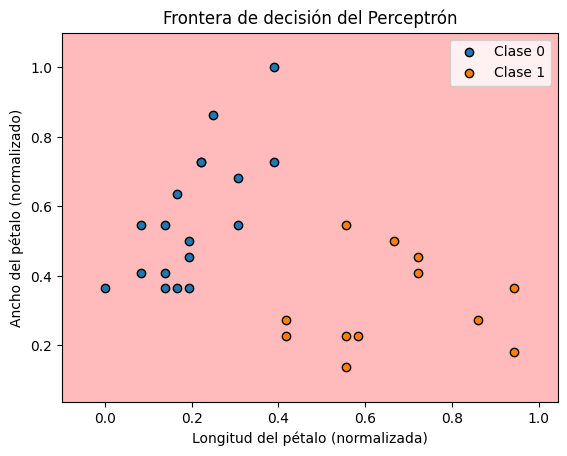

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar los puntos de datos con la frontera de decisión
def plot_decision_boundary(perceptron, X, y):
    # Crear una malla para la frontera de decisión
    x_min, x_max = min([x[0] for x in X]) - 0.1, max([x[0] for x in X]) + 0.1
    y_min, y_max = min([x[1] for x in X]) - 0.1, max([x[1] for x in X]) + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Calcular las predicciones en la malla
    Z = np.array([perceptron.predict([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, colors=["#FFAAAA", "#AAAAFF"])

    # Agregar la línea de frontera
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)

    # Graficar los puntos de datos
    for label in set(y):
        plt.scatter(
            [X[j][0] for j in range(len(y)) if y[j] == label],
            [X[j][1] for j in range(len(y)) if y[j] == label],
            label=f"Clase {label}",
            edgecolor="black"
        )

    plt.title("Frontera de decisión del Perceptrón")
    plt.xlabel("Longitud del pétalo (normalizada)")
    plt.ylabel("Ancho del pétalo (normalizado)")
    plt.legend()
    plt.show()

# Llamar a la función con los datos
plot_decision_boundary(perceptron, X_test, y_test)
